In [2]:
import gzip
import numpy as np
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px)
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784)
    return features, labels

In [3]:
trainX, trainY = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
testX, testY = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

In [4]:
from tensorflow.keras.utils import to_categorical
trainY = trainY.astype(int)
trainY = np.eye(10)[trainY]
testY = testY.astype(int)
testY = np.eye(10)[testY]
print('onehot done')
trainX = trainX/255
testX = testX/255
print('brightness done')

onehot done
brightness done


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(tf.keras.Input(shape=(784,)))
model.add(Dense(128, input_dim=784, use_bias=True, bias_initializer='zeros', activation='relu'))
model.add(Dense(10, use_bias=True, bias_initializer='zeros'))
model.add(Activation('softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(trainX, trainY, epochs=25, validation_split=0.25, verbose=0)

Epoch 1/25
45000/45000 - 37s - loss: 0.5387 - categorical_accuracy: 0.8142 - val_loss: 0.4371 - val_categorical_accuracy: 0.8463 - 37s/epoch - 829us/step
Epoch 2/25
45000/45000 - 39s - loss: 0.4005 - categorical_accuracy: 0.8579 - val_loss: 0.3916 - val_categorical_accuracy: 0.8616 - 39s/epoch - 863us/step
Epoch 3/25
45000/45000 - 50s - loss: 0.3561 - categorical_accuracy: 0.8703 - val_loss: 0.3441 - val_categorical_accuracy: 0.8777 - 50s/epoch - 1ms/step
Epoch 4/25
45000/45000 - 48s - loss: 0.3294 - categorical_accuracy: 0.8796 - val_loss: 0.3479 - val_categorical_accuracy: 0.8731 - 48s/epoch - 1ms/step
Epoch 5/25
45000/45000 - 36s - loss: 0.3119 - categorical_accuracy: 0.8874 - val_loss: 0.3275 - val_categorical_accuracy: 0.8833 - 36s/epoch - 801us/step
Epoch 6/25
45000/45000 - 46s - loss: 0.2959 - categorical_accuracy: 0.8921 - val_loss: 0.3410 - val_categorical_accuracy: 0.8790 - 46s/epoch - 1ms/step
Epoch 7/25
45000/45000 - 40s - loss: 0.2836 - categorical_accuracy: 0.8955 - val_l

In [14]:
model.evaluate(xTest,yTest,verbose=0)

[26.738075256347656, 0.07609999924898148]

In [8]:
model.evaluate(testX,testY,verbose=0)

[0.40165552496910095, 0.875637412071228]

## Dataprep

In [5]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
%matplotlib inline
# for plotting more columns
np.set_printoptions(edgeitems=20, formatter=dict(float=lambda x: "%.3g" % x), linewidth=10000)

In [6]:
trainData = np.loadtxt('fashion-mnist_train.csv', delimiter=',',skiprows=1)
testData = np.loadtxt('fashion-mnist_test.csv', delimiter=',', skiprows=1)

In [7]:
# training data
# target
yTrain = trainData[:,0].astype(int)
# features
xTrain = trainData[:,1:]
print('xTrain -> input to brightness:')
print(xTrain[0][100:130])
xTrain = xTrain/255
print(xTrain[0][100:130])
from tensorflow.keras.utils import to_categorical
print('\nyTrain -> output to onehot:')
print(yTrain[0])
yTrain = yTrain.astype(int)
yTrain = np.eye(10)[yTrain]
print(yTrain[0])

# testing data
# target
yTest = testData[:,0].astype(int)
# features
xTest = testData[:,1:]
print('\n\nxTest -> input to brightness:')
print(xTest[0][100:130])
xTest = xTest/255
print(xTest[0][100:130])
from tensorflow.keras.utils import to_categorical
print('\nyTest -> output to onehot:')
print(yTest[0])
yTestIntegers = yTest.copy()
yTest = yTest.astype(int)
yTest = np.eye(10)[yTest]
print(yTest[0])

xTrain -> input to brightness:
[136 61 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 88 201 228 225 255 115 62 137 255 235 222]
[0.533 0.239 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0.345 0.788 0.894 0.882 1 0.451 0.243 0.537 1 0.922 0.871]

yTrain -> output to onehot:
2
[0 0 1 0 0 0 0 0 0 0]


xTest -> input to brightness:
[133 236 238 236 203 184 20 0 1 0 0 0 0 0 1 0 0 175 245 223 207 205 206 216 255 237 251 232 223 212]
[0.522 0.925 0.933 0.925 0.796 0.722 0.0784 0 0.00392 0 0 0 0 0 0.00392 0 0 0.686 0.961 0.875 0.812 0.804 0.808 0.847 1 0.929 0.984 0.91 0.875 0.831]

yTest -> output to onehot:
0
[1 0 0 0 0 0 0 0 0 0]
0


In [165]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model

# model = Sequential()
# model.add(tf.keras.Input(shape=(784,)))
# model.add(Dense(128, input_dim=784, use_bias=True, bias_initializer='zeros', activation='relu')) # first dense layer, 32 hidden units
# model.add(Dense(10, use_bias=True, bias_initializer='zeros'))
# model.add(Activation('softmax'))
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# hist = model.fit(xTrain, yTrain, epochs=25, batch_size=64, validation_split=0.25, verbose=0)

model = load_model('standard.h5')

predictions = model.predict(xTest)

In [166]:
predictions.shape

(10000, 10)

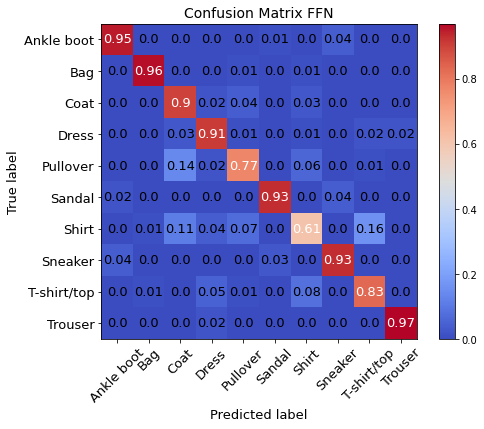

In [167]:
import matplotlib.pyplot as plt
import scikitplot as skplt
import os
from matplotlib import font_manager as fm, rcParams

# transforming onehot to integer predictions
integerpredictions = []
for prediction in predictions:
    integerpredictions.append(prediction.argmax())
conf_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
y_test_labels = [conf_labels[int(x)] for x in yTestIntegers]
y_pred_labels = [conf_labels[int(x)] for x in integerpredictions]
skplt.metrics.plot_confusion_matrix(y_test_labels, y_pred_labels, normalize=True, 
                                    figsize=(8,6), text_fontsize=13,cmap='coolwarm',x_tick_rotation=45,
                                    title='Confusion Matrix FFN',title_fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('confusionFFN.png', dpi=300)
plt.show()

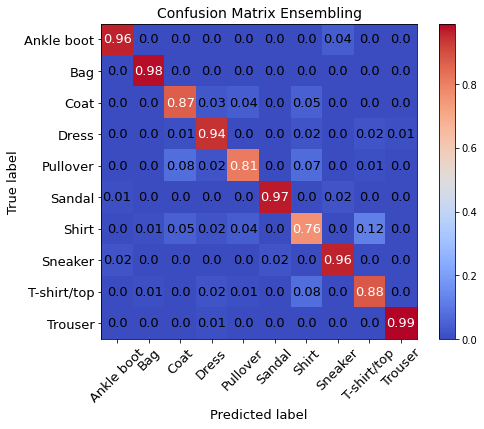

In [168]:
y_pred_labels = np.load("y_pred_labels.npy")
skplt.metrics.plot_confusion_matrix(y_test_labels, y_pred_labels, normalize=True, 
                                    figsize=(8,6), text_fontsize=13,cmap='coolwarm',x_tick_rotation=45,
                                    title='Confusion Matrix Ensembling',title_fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('confusionEnsembling.png', dpi=300)
plt.show()

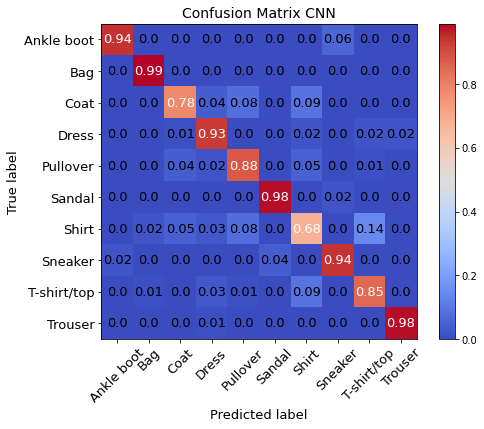

In [169]:
predictions = np.load("cnn_labels.npy")
integerpredictions = []
for prediction in predictions:
    integerpredictions.append(prediction.argmax())
conf_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
y_test_labels = [conf_labels[int(x)] for x in yTestIntegers]
y_pred_labels = [conf_labels[int(x)] for x in integerpredictions]
skplt.metrics.plot_confusion_matrix(y_test_labels, y_pred_labels, normalize=True, 
                                    figsize=(8,6), text_fontsize=13,cmap='coolwarm',x_tick_rotation=45,
                                    title='Confusion Matrix CNN',title_fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('confusionCNN.png', dpi=300)
plt.show()

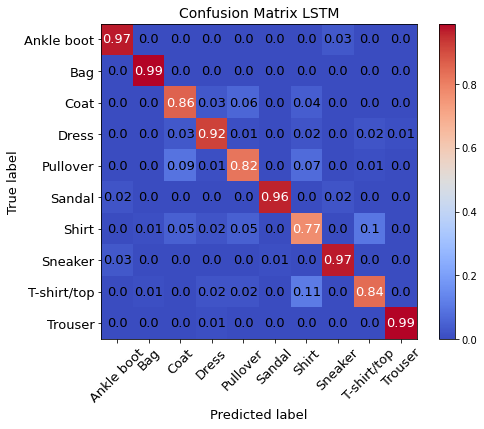

In [170]:
predictions = np.load("lstm_labels.npy")
integerpredictions = []
for prediction in predictions:
    integerpredictions.append(prediction.argmax())
conf_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
y_test_labels = [conf_labels[int(x)] for x in yTestIntegers]
y_pred_labels = [conf_labels[int(x)] for x in integerpredictions]
skplt.metrics.plot_confusion_matrix(y_test_labels, y_pred_labels, normalize=True, 
                                    figsize=(8,6), text_fontsize=13,cmap='coolwarm',x_tick_rotation=45,
                                    title='Confusion Matrix LSTM',title_fontsize=14)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('confusionLSTM.png', dpi=300)
plt.show()

In [46]:
normalizedMatrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
normalizedMatrix

array([[0.83, 0.005, 0.013, 0.054, 0.001, 0.003, 0.079, 0, 0.014, 0.001],
       [0.001, 0.974, 0, 0.018, 0.002, 0.002, 0.003, 0, 0, 0],
       [0.011, 0, 0.768, 0.018, 0.139, 0, 0.059, 0, 0.005, 0],
       [0.019, 0.016, 0.011, 0.908, 0.033, 0.001, 0.01, 0, 0.002, 0],
       [0.001, 0, 0.038, 0.022, 0.901, 0.001, 0.034, 0, 0.003, 0],
       [0.002, 0, 0, 0.001, 0, 0.931, 0, 0.042, 0.005, 0.019],
       [0.158, 0.001, 0.074, 0.042, 0.106, 0, 0.607, 0, 0.011, 0.001],
       [0, 0, 0, 0, 0, 0.03, 0, 0.93, 0, 0.04],
       [0.003, 0, 0.006, 0.001, 0.005, 0.005, 0.012, 0.004, 0.963, 0.001],
       [0, 0, 0, 0, 0, 0.009, 0, 0.039, 0.001, 0.951]])

In [ ]:
from sklearn.utils import resample
resample(data, replace=True, n_samples=4, random_state=1)

In [39]:
for i in range(30):
    
    metrics, history = trainModel(learningRate=0.0001, epochs=25, hiddenlayersize=128, activation='relu')
    losses.append(metrics[0])
    accuracies.append(metrics[1])
    print(f'iteration:{i+2}/30', end='\r')

313/313 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8771


Text(0.875788001704216, 80, 'mean')

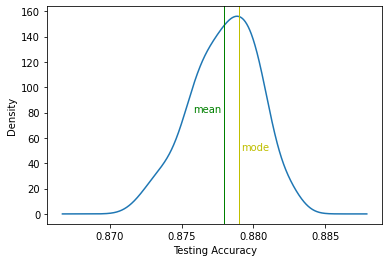

In [134]:
import pandas as pd
plot = pd.Series(accuracies).plot(kind='density',xlabel='test accuracy')
plot.set_xlabel("Testing Accuracy")
mode = pd.Series(accuracies).mode()[2]
plot.axvline(mode, color='y', linewidth=1)
plot.annotate('mode',xy=(mode,90), xytext=(mode+0.00015,50), color='y')
mean = pd.Series(accuracies).mean()
plot.axvline(mean, color='g', linewidth=1)
plot.annotate('mean',xy=(mean,80), xytext=(mean-0.0022,80),color='g')

In [135]:
pd.Series(accuracies).mode()[2]

0.8790000081062317

In [107]:
histories = []
for i in [None, 'sigmoid','relu','elu','selu','tanh','softsign','softplus','softmax']:
    metrics, history = trainModel(learningRate=0.0001, epochs=50, hiddenlayersize=128, activation=i)
    histories.append(history)
    print(f'model {i}: {metrics}')
#     modelEval(metrics,history)

313/313 [==============================] - 0s 842us/step - loss: 0.4274 - accuracy: 0.8554
model None: [0.4274018406867981, 0.855400025844574]
313/313 [==============================] - 0s 787us/step - loss: 0.3429 - accuracy: 0.8778
model sigmoid: [0.3429287374019623, 0.8777999877929688]
313/313 [==============================] - 0s 820us/step - loss: 0.3167 - accuracy: 0.8864
model relu: [0.31673362851142883, 0.8863999843597412]
313/313 [==============================] - 0s 857us/step - loss: 0.3282 - accuracy: 0.8791
model elu: [0.3282445967197418, 0.8791000247001648]
313/313 [==============================] - 0s 838us/step - loss: 0.3341 - accuracy: 0.8788
model selu: [0.3341316878795624, 0.8787999749183655]
313/313 [==============================] - 0s 830us/step - loss: 0.3140 - accuracy: 0.8848
model tanh: [0.31400758028030396, 0.8848000168800354]
313/313 [==============================] - 0s 798us/step - loss: 0.3286 - accuracy: 0.8816
model softsign: [0.3286196291446686, 0.881

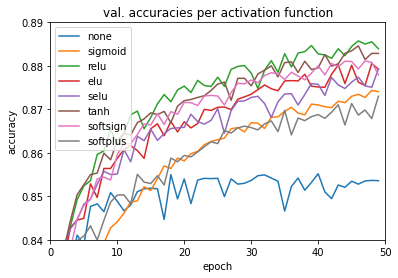

In [112]:
plt.title('val. accuracies per activation function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend = []
sizes = ['none', 'sigmoid','relu','elu','selu','tanh','softsign','softplus','softmax']
for i in range(len(histories)):
    if i in [0,1,2,3,4,5,6,7]:
        legend.append(sizes[i])
        plt.plot(histories[i].history['val_accuracy'])
plt.xlim([0, 50])
plt.ylim([.84,.89])
plt.legend(legend, loc='upper left')
plt.show()

In [93]:
histories = []
for i in [1,0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001]:
    metrics, history = trainModel(learningRate=i, epochs=25, hiddenlayersize=128)
    histories.append(history)
    print(f'model {i}: {metrics}')
#     modelEval(metrics,history)

313/313 [==============================] - 0s 760us/step - loss: 6841.4600 - accuracy: 0.6756
model 1: [6841.4599609375, 0.675599992275238]
313/313 [==============================] - 0s 751us/step - loss: 28.7780 - accuracy: 0.7728
model 0.1: [28.778030395507812, 0.7728000283241272]
313/313 [==============================] - 0s 762us/step - loss: 0.6021 - accuracy: 0.8246
model 0.01: [0.6020763516426086, 0.8245999813079834]
313/313 [==============================] - 0s 816us/step - loss: 0.4483 - accuracy: 0.8525
model 0.001: [0.44826382398605347, 0.8525000214576721]
313/313 [==============================] - 0s 800us/step - loss: 0.4256 - accuracy: 0.8576
model 0.0001: [0.4256456196308136, 0.8575999736785889]
313/313 [==============================] - 0s 842us/step - loss: 0.4913 - accuracy: 0.8392
model 1e-05: [0.491252064704895, 0.8392000198364258]
313/313 [==============================] - 0s 783us/step - loss: 0.8080 - accuracy: 0.7475
model 1e-06: [0.8080116510391235, 0.747500002

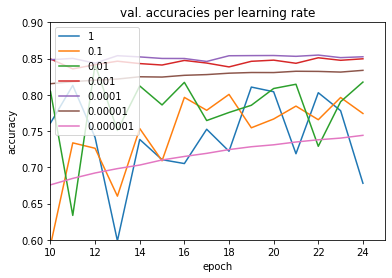

In [99]:
plt.title('val. accuracies per learning rate')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend = []
sizes = ['1','0.1','0.01','0.001','0.0001','0.00001','0.000001','0.0000001']
for i in range(len(histories)):
    if i in [0,1,2,3,4,5,6]:
        legend.append(sizes[i])
        plt.plot(histories[i].history['val_accuracy'])
plt.xlim([10, 25])
plt.ylim([.6,.9])
plt.legend(legend, loc='upper left')
plt.show()

In [14]:
histories

313/313 [==============================] - 0s 557us/step - loss: 0.9259 - accuracy: 0.6876
model 2: [0.9259312748908997, 0.6876000165939331]
313/313 [==============================] - 0s 548us/step - loss: 0.5619 - accuracy: 0.8108
model 4: [0.5619456768035889, 0.8108000159263611]
313/313 [==============================] - 0s 631us/step - loss: 0.4590 - accuracy: 0.8461
model 8: [0.45898160338401794, 0.8460999727249146]
313/313 [==============================] - 0s 592us/step - loss: 0.4353 - accuracy: 0.8530
model 16: [0.4352917969226837, 0.8529999852180481]
313/313 [==============================] - 0s 676us/step - loss: 0.4273 - accuracy: 0.8558
model 32: [0.42733681201934814, 0.8557999730110168]
313/313 [==============================] - 0s 779us/step - loss: 0.4208 - accuracy: 0.8582
model 64: [0.4207665026187897, 0.8582000136375427]
313/313 [==============================] - 0s 782us/step - loss: 0.4208 - accuracy: 0.8567
model 128: [0.42076343297958374, 0.8567000031471252]
313/3

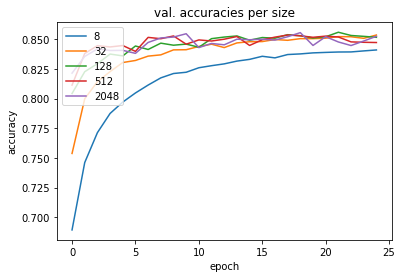

In [21]:
histories = []
for i in [2,4,8,16,32,64,128,256,512,1024,2048]:
    metrics, history = trainModel(learningRate=0.0001, epochs=25, hiddenlayersize=i)
    histories.append(history)
    print(f'model {i}: {metrics}')
plt.title('val. accuracies per size')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend = []
sizes = ['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048']
for i in range(len(histories)):
    if i in [2,4,6,8,10]:
        legend.append(sizes[i])
        plt.plot(histories[i].history['val_accuracy'])
# plt.xlim([10, 25])
# plt.ylim([.84,.86])
plt.legend(legend, loc='upper left')
plt.show()

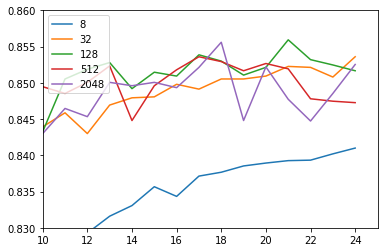

In [27]:
for i in range(len(histories)):
    if i in [2,4,6,8,10]:
        legend.append(sizes[i])
        plt.plot(histories[i].history['val_accuracy'])
plt.xlim([10, 25])
plt.ylim([.83,.86])
plt.legend(legend, loc='upper left')
plt.show()

313/313 [==============================] - 0s 837us/step - loss: 0.3487 - accuracy: 0.8770


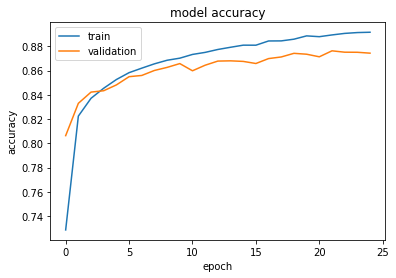

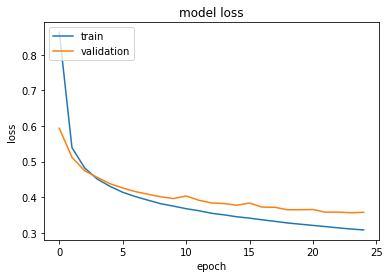

In [29]:
metrics, history = trainModel(activation='relu')
# histories.append(history)
# print(f'model {i}: {metrics}')
modelEval(metrics,history)

# model 1: two layers

In [59]:
model1 = Sequential()
model1.add(tf.keras.Input(shape=(784,)))
model1.add(Dense(128, input_dim=784, activation='relu')) # first dense layer, 32 hidden units
model1.add(Dense(10))                     # second dense layer
model1.add(Activation('softmax'))         # output class probabilities
plot_model(model1, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [60]:
metrics, history = trainModel(model1)
modelEval(metrics,history)

KeyboardInterrupt: 

# model 2: one layer only

In [9]:
model2 = Sequential()
model2.add(tf.keras.Input(shape=(784,)))
model2.add(Dense(10, input_dim=784, activation='relu'))
model2.add(Activation('softmax'))         # output class probabilities
plot_model(model2, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


313/313 [==============================] - 0s 888us/step - loss: 0.3200 - accuracy: 0.8860


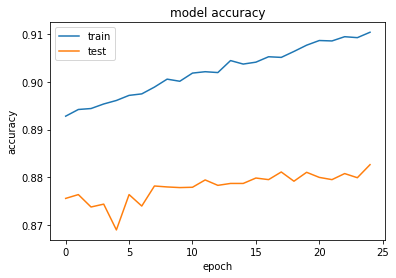

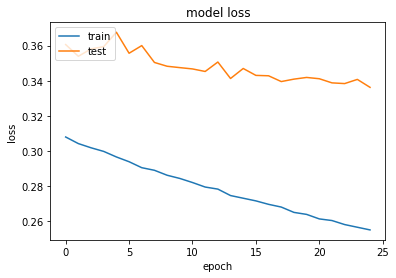

RESULTS ->> accuracy: 0.89, loss: 0.32


In [10]:
metrics,history = trainModel(model1)
modelEval(metrics,history)

# model 3: multiple layers, slowly decreasing node count

In [11]:
model3 = Sequential()
model3.add(tf.keras.Input(shape=(784,)))
model3.add(Dense(128, input_dim=784, activation='relu'))
model3.add(Dense(10, activation = 'softmax'))
plot_model(model3, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [12]:
metrics,history = trainModel(model3)
modelEval(metrics,history)

KeyboardInterrupt: 

# model 4: multiple layers, even slower decrease of node count + dropout

In [ ]:
model4 = Sequential()
model4.add(tf.keras.Input(shape=(784,)))
model4.add(Dense(512, input_dim=784, activation='relu'))
model4.add(Dense(256))
model4.add(Dense(128))
model4.add(Dropout(.3))
model4.add(Dense(64))
model4.add(Dense(32))
model4.add(Dense(10))
model4.add(Activation('softmax'))
plot_model(model4, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

In [ ]:
metrics,history = trainModel(model4)
modelEval(metrics,history)

# model 5: multiple layers, even slower decrease of node count + 3 dropout layers to avoid overfitting

In [ ]:
model5 = Sequential()
model5.add(tf.keras.Input(shape=(784,)))
model5.add(Dense(512, input_dim=784, activation='relu'))
model5.add(Dropout(.3))
model5.add(Dense(256))
model5.add(Dense(128))
model5.add(Dropout(.3))
model5.add(Dense(64))
model5.add(Dense(32))
model5.add(Dropout(.3))
model5.add(Dense(10))
model5.add(Activation('softmax'))
plot_model(model5, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

In [ ]:
metrics,history = trainModel(model5)
modelEval(metrics,history)

# model 6: slow decrease and dropout in every

In [ ]:
model6 = Sequential()
model6.add(tf.keras.Input(shape=(784,)))
model6.add(Dense(512, input_dim=784, activation='relu'))
model6.add(Dropout(.3))
model6.add(Dense(256))
model6.add(Dropout(.3))
model6.add(Dense(128))
model6.add(Dropout(.3))
model6.add(Dense(64))
model6.add(Dropout(.3))
model6.add(Dense(32))
model6.add(Dropout(.3))
model6.add(Dense(10))
model6.add(Activation('softmax'))
plot_model(model6, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

In [ ]:
metrics,history = trainModel(model6)
modelEval(metrics,history)

# model 7: activation in every

In [ ]:
model7 = Sequential()
model7.add(tf.keras.Input(shape=(784,)))
model7.add(Dense(512, input_dim=784, activation='relu'))
model7.add(Dropout(.3))
model7.add(Dense(256, activation='relu'))
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(.3))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(.3))
model7.add(Dense(10, activation='relu'))
model7.add(Activation('softmax'))
plot_model(model7, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

In [ ]:
metrics,history = trainModel(model7)
modelEval(metrics,history)

# model 8: different activation function

In [9]:
model8 = Sequential()
model8.add(tf.keras.Input(shape=(784,)))
model8.add(Dense(512, input_dim=784, activation='relu'))
model8.add(Dropout(.3))
model8.add(Dense(256, activation='relu'))
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(.3))
model8.add(Dense(64, activation='relu'))
model8.add(Dense(32, activation='relu'))
model8.add(Dropout(.3))
model8.add(Dense(10))
model8.add(Activation('softmax'))
plot_model(model8, to_file='m.png', show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


313/313 [==============================] - 1s 2ms/step - loss: 0.3080 - accuracy: 0.8965


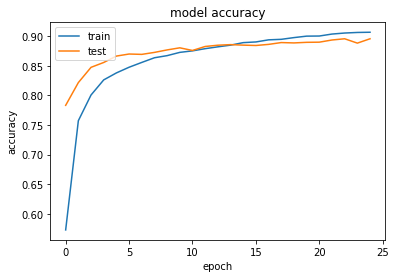

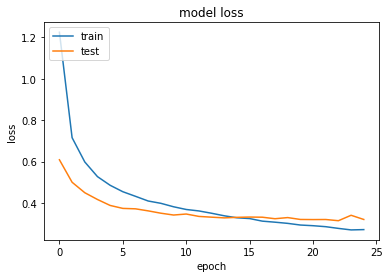

RESULTS ->> accuracy: 0.90, loss: 0.31


In [10]:
metrics, history = trainModel(model8)
modelEval(metrics,history)

In [132]:
def trainModelAlterHidden(learningRate=0.0001, epochs=25, hidden=[128]):
    model = Sequential()
    model.add(tf.keras.Input(shape=(784,)))
    model.add(Dense(hidden[0], input_dim=784, use_bias=True, bias_initializer='zeros', activation='relu'))
    for i in range(1,len(hidden)):
        model.add(Dense(hidden[i], use_bias=True, bias_initializer='zeros', activation='relu'))
    model.add(Dense(10, use_bias=True, bias_initializer='zeros'))
    model.add(Activation('softmax'))
    model.compile(optimizer=Adam(learning_rate=learningRate), loss='categorical_crossentropy', metrics=['accuracy'])
    hist = model.fit(xTrain, yTrain, epochs=epochs, batch_size=64, validation_split=0.25, verbose=0)
    
    return model.evaluate(xTest, yTest), hist

In [142]:
histories = []
sizes = [
    [128,1024,128],
    [128,256,128],
    [128,512,128],
    [128,256],
    [128,128,128],
    [128,128,128,128],
    [128,1024]
]
for size in sizes:
    print(size)
    metrics, h = trainModelAlterHidden(hidden=size,learningRate=0.0001)
    histories.append(h)
    print(metrics)

[128, 1024, 128]
313/313 [==============================] - 1s 2ms/step - loss: 0.3093 - accuracy: 0.8902
[0.30928099155426025, 0.8902000188827515]
[128, 256, 128]
313/313 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8822
[0.32089319825172424, 0.8822000026702881]
[128, 512, 128]
313/313 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8943
[0.30900147557258606, 0.8942999839782715]
[128, 256]
313/313 [==============================] - 0s 1ms/step - loss: 0.3253 - accuracy: 0.8841
[0.3253075182437897, 0.8841000199317932]
[128, 128, 128]
313/313 [==============================] - 0s 995us/step - loss: 0.3237 - accuracy: 0.8820
[0.32372230291366577, 0.8820000290870667]
[128, 128, 128, 128]
313/313 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8821
[0.3274060785770416, 0.882099986076355]
[128, 1024]
313/313 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8893
[0.30877202749252

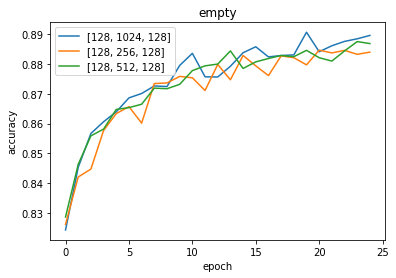

In [143]:
plt.title('empty')
plt.ylabel('accuracy')
plt.xlabel('epoch')
legend = []
sizes = [str(x) for x in sizes]
for i in range(len(histories)):
    if i in [0,1,2]:
        legend.append(sizes[i])
        plt.plot(histories[i].history['val_accuracy'])
# plt.xlim([0, 50])
# plt.ylim([.84,.89])
plt.legend(legend, loc='upper left')
plt.show()